In [2]:
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, Dense, Bidirectional

In [3]:
max_features = 10000
maxlen = 500

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


__Побудова та навчання RNN моделі__

In [4]:
rnn_model = Sequential()
rnn_model.add(Embedding(
    max_features,
    128,
    input_length=maxlen
))
rnn_model.add(SimpleRNN(
    64,
    return_sequences=False
))
rnn_model.add(Dense(
    1,
    activation='sigmoid'
))
rnn_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)
rnn_model.summary()

/Users/som/Library/Caches/pypoetry/virtualenvs/python-ds-mn4lpF3A-py3.12/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [5]:
history_rnn = rnn_model.fit(
    x_train,
    y_train,
    epochs=5,
    batch_size=32,
    validation_split=0.2
)

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 43ms/step - accuracy: 0.6059 - loss: 0.6417 - val_accuracy: 0.7542 - val_loss: 0.5079
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 43ms/step - accuracy: 0.8124 - loss: 0.4274 - val_accuracy: 0.8104 - val_loss: 0.4495
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 44ms/step - accuracy: 0.8458 - loss: 0.3580 - val_accuracy: 0.7202 - val_loss: 0.5734
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 44ms/step - accuracy: 0.8576 - loss: 0.3350 - val_accuracy: 0.7586 - val_loss: 0.5120
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 44ms/step - accuracy: 0.9130 - loss: 0.2311 - val_accuracy: 0.5840 - val_loss: 0.6816


__Побудова та навчання LSTM моделі__

In [6]:
lstm_model = Sequential()
lstm_model.add(Embedding(
    max_features,
    128,
    input_length=maxlen
))
lstm_model.add(LSTM(
    64,
    return_sequences=False
))
lstm_model.add(Dense(
    1,
    activation='sigmoid'
))
lstm_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)
lstm_model.summary()

/Users/som/Library/Caches/pypoetry/virtualenvs/python-ds-mn4lpF3A-py3.12/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [7]:
history_lstm = lstm_model.fit(
    x_train,
    y_train,
    epochs=5,
    batch_size=32,
    validation_split=0.2
)

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 91s 146ms/step - accuracy: 0.7254 - loss: 0.5395 - val_accuracy: 0.8426 - val_loss: 0.3724
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 91s 146ms/step - accuracy: 0.8411 - loss: 0.3714 - val_accuracy: 0.8410 - val_loss: 0.3918
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 90s 145ms/step - accuracy: 0.9052 - loss: 0.2418 - val_accuracy: 0.8776 - val_loss: 0.3269
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 84s 134ms/step - accuracy: 0.9335 - loss: 0.1802 - val_accuracy: 0.8778 - val_loss: 0.3281
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 97s 156ms/step - accuracy: 0.9524 - loss: 0.1318 - val_accuracy: 0.8622 - val_loss: 0.3815


__Побудова та навчання двосторонньої LSTM моделі__

In [8]:
bilstm_model = Sequential()
bilstm_model.add(Embedding(
    max_features,
    128,
    input_length=maxlen
))
bilstm_model.add(Bidirectional(
    LSTM(
        64,
        return_sequences=False
    )
))
bilstm_model.add(Dense(
    1,
    activation='sigmoid'
))
bilstm_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)
bilstm_model.summary()

/Users/som/Library/Caches/pypoetry/virtualenvs/python-ds-mn4lpF3A-py3.12/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [9]:
history_bilstm = bilstm_model.fit(
    x_train,
    y_train,
    epochs=5,
    batch_size=32,
    validation_split=0.2
)

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 140s 222ms/step - accuracy: 0.7006 - loss: 0.5499 - val_accuracy: 0.8364 - val_loss: 0.3968
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 148s 237ms/step - accuracy: 0.8827 - loss: 0.2932 - val_accuracy: 0.8716 - val_loss: 0.3236
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 148s 237ms/step - accuracy: 0.9230 - loss: 0.2083 - val_accuracy: 0.8576 - val_loss: 0.3385
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 149s 238ms/step - accuracy: 0.9427 - loss: 0.1549 - val_accuracy: 0.8538 - val_loss: 0.3312
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 145s 231ms/step - accuracy: 0.9609 - loss: 0.1104 - val_accuracy: 0.8596 - val_loss: 0.4508


782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.5756 - loss: 0.6825
RNN Test Accuracy: 0.5781999826431274
RNN Test Loss: 0.6826976537704468
782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 44ms/step - accuracy: 0.8513 - loss: 0.4035
LSTM Test Accuracy: 0.8521999716758728
LSTM Test Loss: 0.3996660113334656
782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 43ms/step - accuracy: 0.8590 - loss: 0.4504
BiLSTM Test Accuracy: 0.8601199984550476
BiLSTM Test Loss: 0.43967992067337036


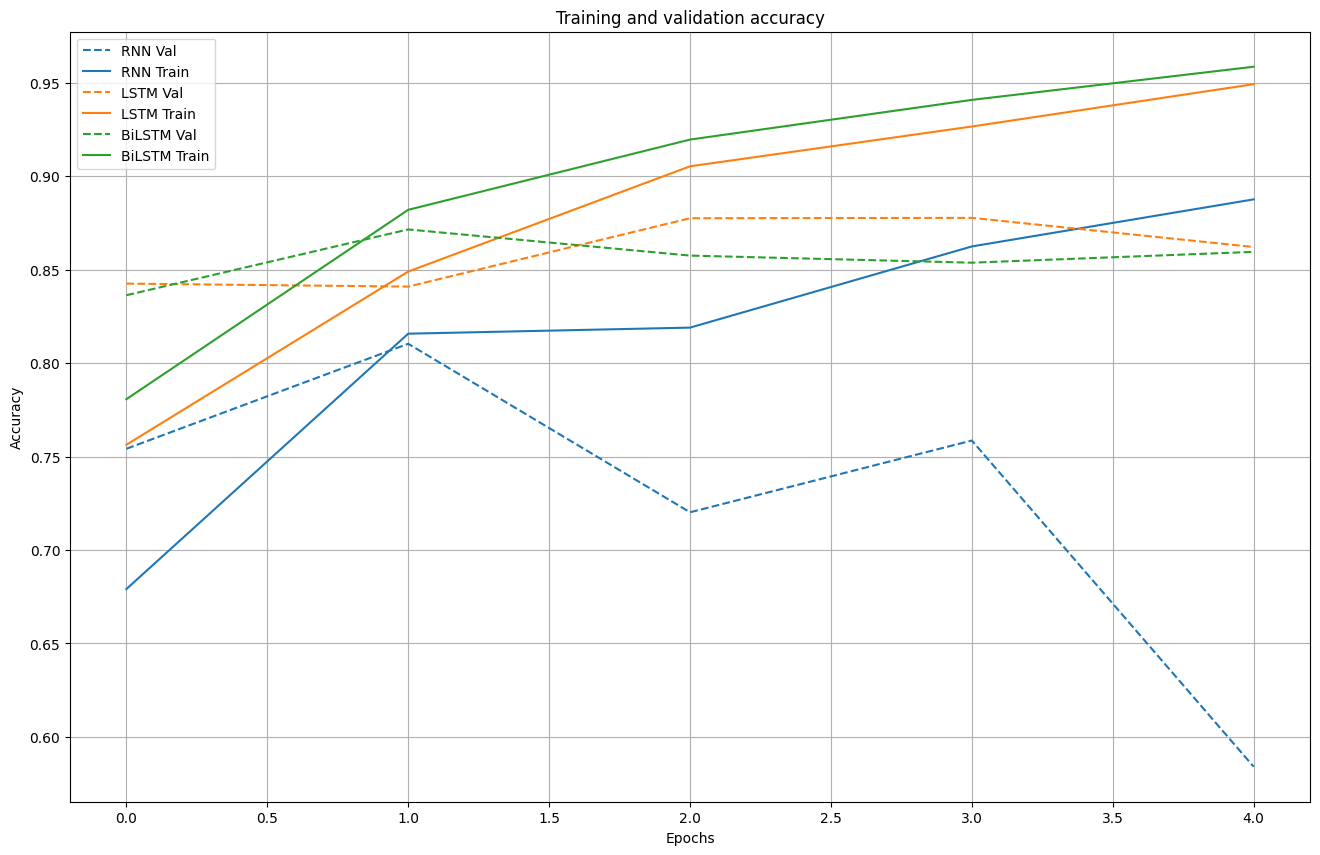

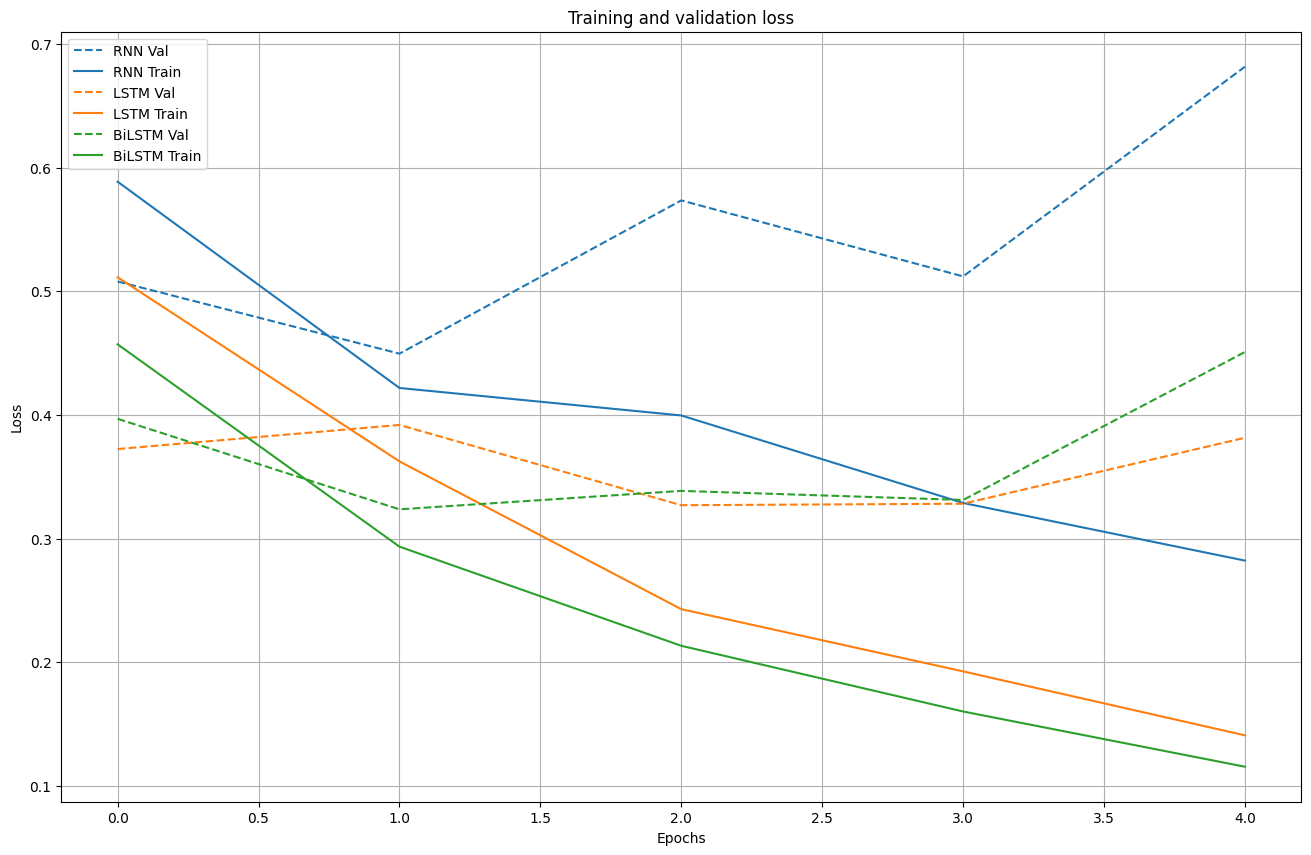

In [10]:
# Оценка моделей на тестовых данных
rnn_test_loss, rnn_test_acc = rnn_model.evaluate(x_test, y_test)
print(f'RNN Test Accuracy: {rnn_test_acc}')
print(f'RNN Test Loss: {rnn_test_loss}')

lstm_test_loss, lstm_test_acc = lstm_model.evaluate(x_test, y_test)
print(f'LSTM Test Accuracy: {lstm_test_acc}')
print(f'LSTM Test Loss: {lstm_test_loss}')

bilstm_test_loss, bilstm_test_acc = bilstm_model.evaluate(x_test, y_test)
print(f'BiLSTM Test Accuracy: {bilstm_test_acc}')
print(f'BiLSTM Test Loss: {bilstm_test_loss}')

# Визуализация истории обучения
import matplotlib.pyplot as plt

def plot_history(histories, key='accuracy'):
    plt.figure(figsize=(16, 10))
    
    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_' + key], '--', label=name + ' Val')
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(), label=name + ' Train')
    
    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_',' ').title())
    plt.legend()
    plt.grid(True)
    plt.title(f'Training and validation {key}')
    plt.show()

# Визуализация точности
plot_history([('RNN', history_rnn), ('LSTM', history_lstm), ('BiLSTM', history_bilstm)], key='accuracy')

# Визуализация потерь
plot_history([('RNN', history_rnn), ('LSTM', history_lstm), ('BiLSTM', history_bilstm)], key='loss')

__Загальні висновки__

1.RNN: Найгірше справляється з задачою через коливання і зростання втрат на валідаційних даних. Переобучення є основною проблемою.


2.LSTM: Демонструє хорошу продуктивність з стабільним зростанням точності і зниженням втрат на валідаційних даних. Хороший вибір для цієї задачі.


3.BiLSTM: Найкращі результати на тренувальних даних, але з деякими коливаннями на валідаційних даних. Може бути трохи схильна до переобучення, але загалом показує високі результати.


Таким чином, LSTM є найбільш збалансованою і стабільною моделлю для задачі класифікації рецензій на основі наявних графіків.